C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


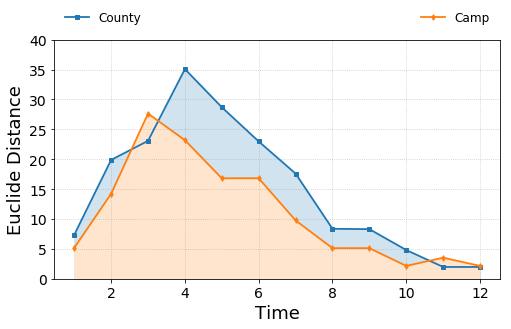

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# import matplotlib 
import itertools
from matplotlib.ticker import MaxNLocator
import math
from scipy.interpolate import spline
import numpy as np
plt.figure(figsize=(8,4.4))
data = pd.read_csv("distance.csv", delimiter=',', header=0) 
time = []
ferguson_distances=[]
camp_distances = []
for index, row in data.iterrows():
    if row["Dataset"] == 'County':
        ferguson_distances.append(row["Distance"])
        time.append(row["Time"])
    if row["Dataset"] == 'Camp':
        camp_distances.append(row["Distance"])

plt.figure(1)
ax1 = plt.subplot(111)
plt.grid(True, color='#8b8b8d', linestyle='dotted', alpha=0.5)
T = np.arange(1,13)
xnew = np.linspace(T.min(),T.max(),230) #300 represents number of points to make between T.min and T.max
ferguson_distances = list(np.array(ferguson_distances)/(2*3.1415))
camp_distances = list(np.array(camp_distances)/(2*3.1415))
power_smooth = spline(T,ferguson_distances,xnew)
power_smooth2 = spline(T,camp_distances,xnew)
ax1.plot(time, ferguson_distances, '-s',ms=4, label='County',linewidth=1.8)
ax1.fill_between(time, ferguson_distances, color='#D2E3F0')

ax1.plot(time, camp_distances, '-d', ms=4, label='Camp', linewidth=1.8)
ax1.fill_between(time, camp_distances, color='#FFE5CE')
# ax1.plot(time, camp_precisions, '-', marker='o', ms=5, label='Camp', linewidth=1.5)
# ax1.plot(time, ute_precisions, '-', marker='d', ms=5, label='UTE', color="#737373", linewidth=1.5)
ax1.set_xlabel('Time',fontsize=18)
ax1.set_ylabel('Euclide Distance',fontsize=18)
ax1.set_ylim(0, 40)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
# ax1.title.set_text('Precision')
# ax1.set_title('Precision', x=0.88, y=0.1, fontsize=12,fontweight='bold')
ax1.tick_params(axis="x", labelsize=14)
ax1.tick_params(axis="y", labelsize=14)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", frameon=False, fontsize=12)

plt.savefig('../../figures/dist.png')


